In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
from scipy import stats

In [2]:
# Load the dataset
df = pd.read_csv('/Users/hemanthnarlasubramanyam/Documents/PYTHON PROJECTS/marketing_AB 2.csv')

# Display the first few rows
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
#Overview of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [4]:
#checking the missing values
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [8]:
#checking for dupilcates
df.duplicated().sum()

0

In [9]:
#Dropping unnecessary columns
df.drop('Unnamed: 0' , axis = 1 , inplace = True)

df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


The dataset is clean and ready for analysis with no missing values or duplicates. 

# Exploratory Data Analysis

In [13]:
# Number of used_id by each test_group 
df_tg = df.groupby(['test group'])['user id'].nunique()
print(df_tg)

test group
ad     564577
psa     23524
Name: user id, dtype: int64


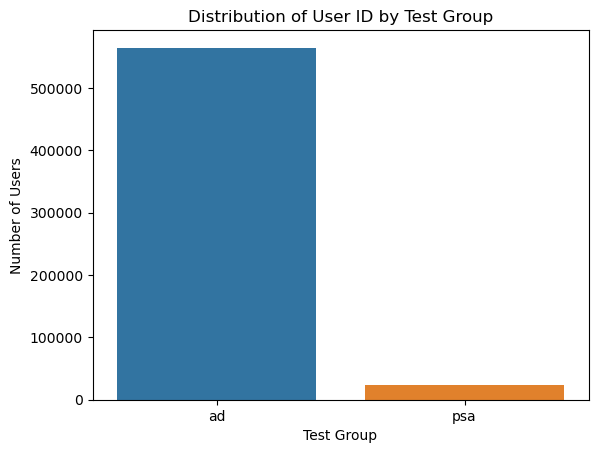

In [15]:
# Plot distribution of users by test group
sns.countplot(data=df, x='test group')
plt.title('Distribution of User ID by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Number of Users')
plt.show()

# Feature Engineering

Now, let’s calculate the conversion rate and see how this marketing campaign performed.

In [20]:
# Conversion rate calculation
conversion_rate = (df['converted'].sum() / df['user id'].nunique()) * 100

# Display the conversion rate with two decimal places
print('Conversion rate = {:.2f}%'.format(conversion_rate))

Conversion rate = 2.52%


 The conversion rate we got doesn’t prove that the ads are successful. We need to check more closely.

In [26]:
# DataFrames for Ads and PSA groups
df_ad = df[df['test group'] == 'ad']
df_psa = df[df['test group'] == 'psa']

# Number of conversions in each group
count_conversions_ad = df_ad['converted'].sum()
count_conversions_psa = df_psa['converted'].sum()

# Total number of unique users in each group
total_observations_ad = df_ad['user id'].nunique()
total_observations_psa = df_psa['user id'].nunique()

# Conversion rates for Ads and PSA groups
purchase_rate_ad = (count_conversions_ad / total_observations_ad) * 100
purchase_rate_psa = (count_conversions_psa / total_observations_psa) * 100

print("Purchase Rate for 'Ad' Group: {:.2f}%".format(purchase_rate_ad))
print("Purchase Rate for 'PSA' Group: {:.2f}%".format(purchase_rate_psa))

Purchase Rate for 'Ad' Group: 2.55%
Purchase Rate for 'PSA' Group: 1.79%


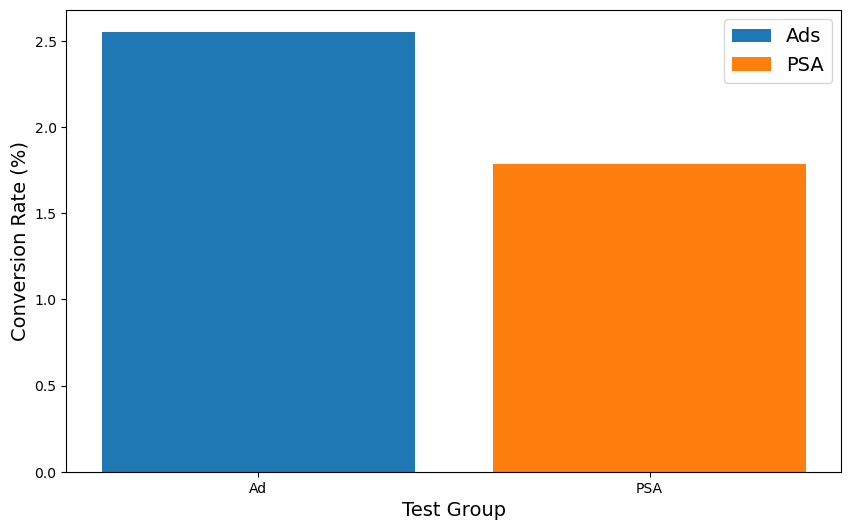

In [27]:
# Plot the conversion rates
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
ax.bar('Ad', purchase_rate_ad, label='Ads')
ax.bar('PSA', purchase_rate_psa, label='PSA')

# Add labels
ax.set_ylabel('Conversion Rate (%)', fontsize=14)
ax.set_xlabel('Test Group', fontsize=14)
ax.legend(fontsize=14)
plt.show()

The conversion rate results indicate that the Ads are more successful than the PSA, with a conversion rate of 2.55% compared to 1.79%. This suggests that the Ads are effective, but we need a statistical analysis to confirm if this difference is significant and if the campaign can be considered a success.

### Hypothesis Testing (Z-Test)

In [28]:
# Data for hypothesis test
count_purchase = [count_conversions_ad, count_conversions_psa]
count_observation = [total_observations_ad, total_observations_psa]

# One-sided Z-test
z_stat, p_value = proportions_ztest(count=count_purchase, nobs=count_observation, alternative='larger')

# Display Z-score and P-value
print(f"Z-Score: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion based on P-value
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: Ads group has a significantly higher conversion rate.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference between Ads and PSA conversion rates.")

Z-Score: 7.3701
P-Value: 0.0000
Reject Null Hypothesis: Ads group has a significantly higher conversion rate.


## Decision Rule and Critical Value

In [29]:
# Critical value for a one-sided test (right tail)
z_crit = stats.norm.ppf(1 - alpha)
print(f"Critical Value (Z): {z_crit:.4f}")

# Make decision based on Z-statistic
if z_stat > z_crit:
    print("Decision: Reject Null Hypothesis")
else:
    print("Decision: Fail to Reject Null Hypothesis")

Critical Value (Z): 1.6449
Decision: Reject Null Hypothesis


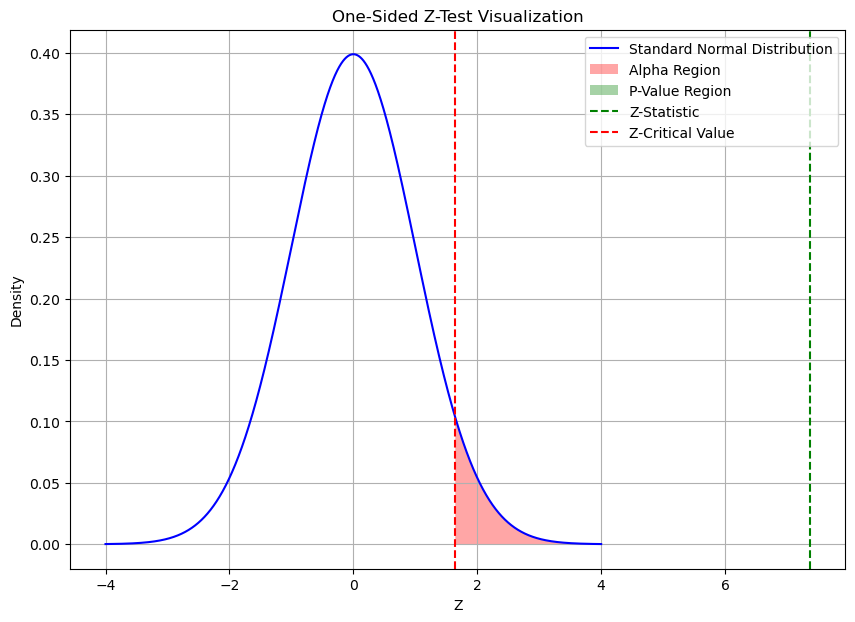

In [31]:
# Plot standard normal distribution
fig, ax = plt.subplots(figsize=(10, 7))

# Standard normal distribution curve
x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, 0, 1), color='blue', label='Standard Normal Distribution')

# Alpha region (right tail)
x_alpha_right = np.arange(z_crit, 4, 0.001)
y_alpha_right = stats.norm.pdf(x_alpha_right)
plt.fill_between(x=x_alpha_right, y1=y_alpha_right, facecolor='red', alpha=0.35, label='Alpha Region')

# P-value region
x_pvalue = np.arange(z_stat, 4, 0.001)
y_pvalue = stats.norm.pdf(x_pvalue)
plt.fill_between(x=x_pvalue, y1=y_pvalue, facecolor='green', alpha=0.35, label='P-Value Region')

# Plot Z-statistic and Z-critical
plt.axvline(z_stat, color="green", linestyle="--", label="Z-Statistic")
plt.axvline(z_crit, color="red", linestyle="--", label="Z-Critical Value")

# Add labels
plt.legend()
plt.xlabel("Z")
plt.ylabel("Density")
plt.title("One-Sided Z-Test Visualization")
plt.grid(True)
plt.show()

Here are the results and visualizations from the one-sided Z-test:

* Critical Value (Right Tail): 1.645
* Z-Statistic: 7.3701
* P-Value: 8.53e-14

## Conclusion:
* Statistical Significance: The z-test results demonstrate a highly significant statistical difference in conversion rates between the ‘Ads’ group and the ‘PSA’ group.
* Business Impact: The ‘Ads’ group has achieved a notably higher conversion rate compared to the Public Service Announcement (PSA) group. This indicates the success of the advertising campaign implemented by the ‘Ads’ group in driving conversions.